
### 1. Refresher: Basic SQL Operations

- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.



In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
# Menampilkan semua data dalam employees
spark.sql('SELECT * FROM employees').show()

# Menampilkan data dengan Salary di atas 3000
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

# Menampilkan rata-rata dari Salary
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.

In [6]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [9]:
# Rata-rata gaji per departemen
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()

#Menemukan karyawan dengan gaji diatas rata-rata untuk gender masing-masing
spark.sql('''
WITH GenderAverage AS (
  SELECT Gender, AVG(Salary) AS AvgSalary
  FROM employees
  GROUP BY Gender
)
SELECT e.DeptID, e.Name, e.Gender, e.Salary
FROM employees e
JOIN GenderAverage ga ON e.Gender = ga.Gender
WHERE e.Salary > ga.AvgSalary
''').show()

#Ranking karyawan berdasarkan gaji dalam departemen mereka
spark.sql('''
SELECT DeptID, Name, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
''').show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

+------+-----+------+------+
|DeptID| Name|Gender|Salary|
+------+-----+------+------+
|     1|James|     M|  3000|
+------+-----+------+------+

+------+-----+------+----------+
|DeptID| Name|Salary|SalaryRank|
+------+-----+------+----------+
|     1|James|  3000|         1|
|     1|  Lee|  2700|         2|
|     2| Anna|  4100|         1|
+------+-----+------+----------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.

In [10]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.

In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [14]:
# Tugas 5
spark.sql('''
SELECT e.Name, e.DeptId, d.DeptName, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY d.DeptName) AS AvgSalary,
       RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+------+---------+------+---------+----------+
| Name|DeptId| DeptName|Salary|AvgSalary|SalaryRank|
+-----+------+---------+------+---------+----------+
|James|     1|       HR|  3000|   2850.0|         1|
|  Lee|     1|       HR|  2700|   2850.0|         2|
| Anna|     2|Marketing|  4100|   4100.0|         1|
+-----+------+---------+------+---------+----------+



In [17]:
# Tugas 6
spark.sql('''
SELECT e.Name, d.DeptName, e.Age, AVG(e.Salary) OVER (PARTITION BY d.DeptName, e.Age) as AvGSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+---------+---+---------+
| Name| DeptName|Age|AvGSalary|
+-----+---------+---+---------+
|  Lee|       HR| 23|   2700.0|
|James|       HR| 34|   3000.0|
| Anna|Marketing| 28|   4100.0|
+-----+---------+---+---------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


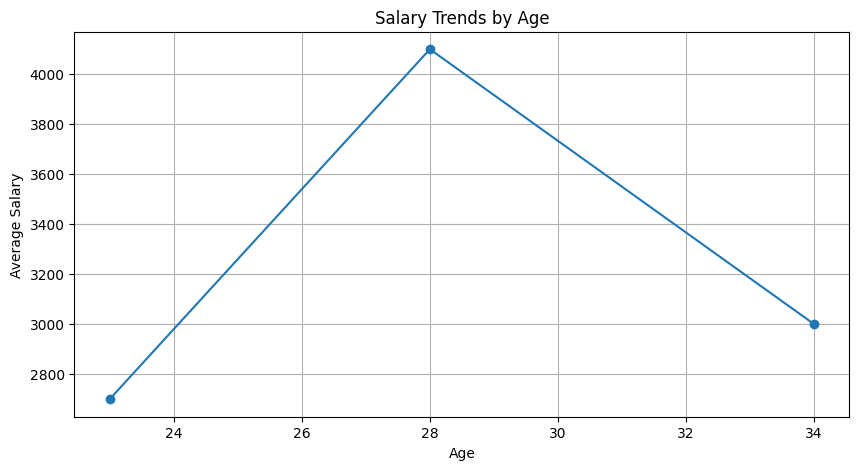

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


+---------+--------------+-----------+
| DeptName|TotalEmployees|TotalSalary|
+---------+--------------+-----------+
|       HR|             2|       5700|
|Marketing|             1|       4100|
+---------+--------------+-----------+



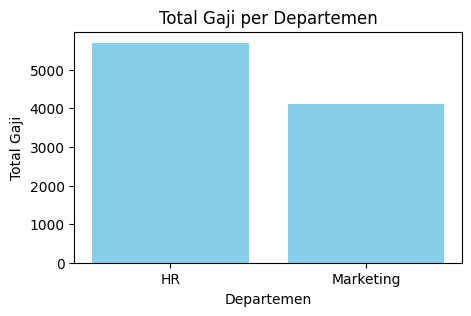

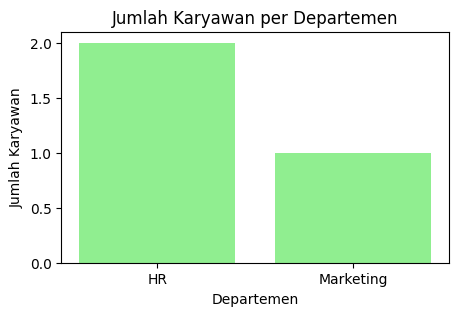

In [20]:
# Tugas 1
Ass1 = spark.sql('''
SELECT d.DeptName, COUNT(e.Name) AS TotalEmployees, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')
Ass1.show()

import matplotlib.pyplot as plt
import pandas as pd

# Ambil data hasil query dalam bentuk Pandas DataFrame
data = Ass1.toPandas()

# Plot perbandingan Total Salary per Department
plt.figure(figsize=(5, 3))
plt.bar(data['DeptName'], data['TotalSalary'], color='skyblue')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.show()

# Plot perbandingan Total Employees per Department
print("\n")
plt.figure(figsize=(5, 3))
plt.bar(data['DeptName'], data['TotalEmployees'], color='lightgreen')
plt.title('Jumlah Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Jumlah Karyawan')
plt.show()

+------------------+
|     AverageSalary|
+------------------+
|3266.6666666666665|
+------------------+

+----+---+------+
|Name|Age|Salary|
+----+---+------+
|Anna| 28|  4100|
+----+---+------+



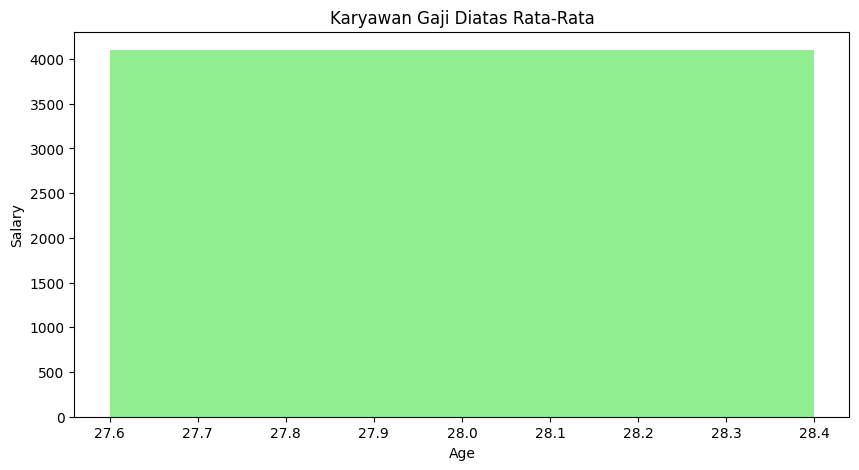

In [33]:
# TUGAS 2
spark.sql('''
SELECT AVG(Salary) as AverageSalary FROM employees
''').show()

x = spark.sql('''
SELECT Name, Age, Salary
FROM Employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''')

x.show()

data = x.toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(data['Age'], data['Salary'], color='lightgreen')
plt.title('Karyawan Gaji Diatas Rata-Rata')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

+--------------------+---------------+
|           Pekerjaan|TotalPendapatan|
+--------------------+---------------+
|System Administrator|     1069000000|
|         UX Designer|     1278000000|
|     Project Manager|     1094000000|
|       Web Developer|     1500000000|
|     DevOps Engineer|     1525000000|
|      Data Scientist|     1890000000|
|        Data Analyst|     1419000000|
|    Digital Marketer|      867000000|
|   Software Engineer|     1054000000|
|     Product Manager|     1136000000|
+--------------------+---------------+

+----------+--------------------+
|      Kota|   AveragePendapatan|
+----------+--------------------+
|Yogyakarta|1.2081818181818181E8|
| Palembang|1.2222222222222222E8|
|   Bandung|1.2318181818181819E8|
|  Makassar|            1.2625E8|
|     Medan|1.2753846153846154E8|
|  Surabaya|             1.285E8|
|   Jakarta|1.3033333333333333E8|
|  Semarang|             1.306E8|
|Balikpapan|             1.365E8|
|  Denpasar|1.4583333333333334E8|
+----------

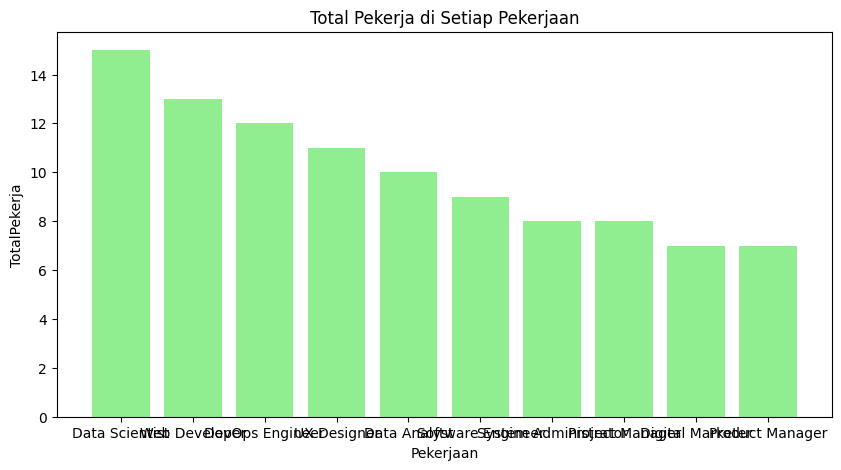

In [46]:
# TUGAS 3
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Analisis Dataset").getOrCreate()

file = "datasetdah.csv"
df_spark = spark.read.option("header", True).csv(file, inferSchema=True)

df_spark.createOrReplaceTempView("Dataset")

# FUNGSI SUM
spark.sql('''
SELECT Pekerjaan, SUM(Pendapatan) AS TotalPendapatan
FROM Dataset
GROUP BY Pekerjaan
''').show()

# FUNGSI AVG
spark.sql('''
SELECT Kota, AVG(Pendapatan) AS AveragePendapatan
FROM Dataset
GROUP BY Kota
ORDER BY AveragePendapatan
''').show()

# FUNGSI COUNT
x = spark.sql('''
SELECT Pekerjaan, COUNT(*) AS TotalPekerja
FROM Dataset
GROUP BY Pekerjaan
ORDER BY TotalPekerja DESC
''')

x.show()

# Visualisasi
data = x.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(data['Pekerjaan'], data['TotalPekerja'], color='lightgreen')
plt.title('Total Pekerja di Setiap Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('TotalPekerja')
plt.show()